Rscript ../correct_barcode.R --barcode_file=SRR14048756_S1_L001_R2_001.fastq.gz  --whitelist_file=/media/leon/Masha/ATAC/cellranger-atac-2.1.0/lib/python/atac/barcodes/737K-cratac-v1.txt --path_output_fq=./bc_corrected
cd bc_corrected
awk '$2 != $3 {print $2 "\t" $3}' "tagfile_SRR14048756_S1_L001_R2_001.fastq.gz.txt" > subset.txt

Summary (correct_barcode): total valid: 85024836; total corrected: 3800552; total discarded: 1632494.

In [2]:
import pandas as pd

In [28]:
# колонка 1 - последовательности из fastq-файла, колонка 2 - на что исправлены
df = pd.read_csv("/media/leon/Polina/atac_rna/raw_fastqs/SRR14048756/bc_corrected/subset.txt", sep='\t', header=None, index_col=1)
df

,0
1,
ATGTCTTAGCTGATTC,ATGTCTTAGCTGATTA
TGGTCAACAGTAGGCA,TGGTCCACAGTAGGCA
TTCATTGGTCATAAGA,GTCATTGGTCATAAGA
ATCCTGCCAAGCGTCC,ATCTTGCCAAGCGTCC
AAACTGCCAATACTGC,AAACAGCCAATACTGC
...,...
GCGTTGGTCACTGGTA,NCGTTGGTCACTGGTA
GGAACCCGTACGCCCA,NGAACCCGTACGCCCA
CTGTATTTCACATCCC,NTGTATTTCACATCCC


In [132]:
## Result: 878687/1902161 are 1 mismatch away from whitelist barcodes.
len(set(df[0]))

878687

In [28]:
for i in "alpha beta gamma delta EC stellate acinar ductal immune".split():
    barcodes = open(f"/media/leon/Masha/barcodes/SRR14048756_{i}.txt").read().splitlines()
    print(len(barcodes))

2660
1742
92
304
30
39
177
93
35


In [47]:
barcodes = open(f"/media/leon/Masha/barcodes/SRR14048756_alpha.txt").read().splitlines()
barcodes = [i[3:] for i in barcodes]
barcodes

['AAACGAAAGGAAGGTA',
 'AAACGAACAAACGACG',
 'AAACGAAGTCTGGGCT',
 'AAACGAAGTGGACAGT',
 'AAACGAAGTGTCGTGC',
 'AAACGAATCACTACCC',
 'AAACGAATCTTCGTTA',
 'AAACTCGAGACTAGGC',
 'AAACTCGCAAGCAATA',
 'AAACTCGGTAGAACGC',
 'AAACTCGGTATCTGCA',
 'AAACTGCAGAACGTCG',
 'AAACTGCGTGCGCTCA',
 'AAACTGCGTTGTGACT',
 'AAACTGCTCCATCTAT',
 'AAAGATGCAAACCTAC',
 'AAAGATGGTCCCGAGT',
 'AAAGGATCAACGCACC',
 'AAAGGATGTCTGTCCT',
 'AAAGGATGTGTCCAGC',
 'AAAGGATGTGTCTACA',
 'AAAGGGCCAAATTCCG',
 'AAAGGGCCATCATCGA',
 'AAAGGGCCATCGAGTT',
 'AAAGGGCGTAGAAAGG',
 'AAAGGGCTCCTGACCT',
 'AAATGAGAGAACGTCG',
 'AAATGAGAGAAGAGTG',
 'AAATGAGAGGCCTAAG',
 'AAATGAGAGTAGAAGG',
 'AAATGAGCACATCATG',
 'AAATGAGTCACTGGTA',
 'AAATGAGTCGGGTCCA',
 'AAATGCCAGGAGTCTG',
 'AAATGCCAGTGATTAG',
 'AAATGCCCATTCACGA',
 'AAATGCCGTAGTCTGT',
 'AAATGCCTCACTACCC',
 'AAATGCCTCATCATGG',
 'AAATGCCTCGGCTATA',
 'AACAAAGAGACGCCCT',
 'AACAAAGAGTCGAAAT',
 'AACAAAGCACAGAAGC',
 'AACAAAGCATGGGACA',
 'AACAGTCAGTCCCGCA',
 'AACAGTCGTTCCCTTG',
 'AACAGTCTCCGATTGA',
 'AACATCGAGGA

In [80]:
# сабсет датафрейма для которого индексы совпадают со значениями из списка barcodes
adf = df.loc[barcodes, 0].to_frame()
adf

,0
1,
AAACGAAAGGAAGGTA,AAACGAAAGGAATGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTC
AAACGAAAGGAAGGTA,AAACGAAAGGAAGCTA
AAACGAAAGGAAGGTA,AAACGAAAGGACGGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTC
...,...
TTTGTGTTCATGTTCT,NTTGTGTTCATGTTCT
TTTGTGTTCATGTTCT,TTTGTGTTCATGTTGT
TTTGTGTTCATGTTCT,GTTGTGTTCATGTTCT


In [81]:
print(len(barcodes))
print(len(adf.index.unique()))
adf.index.unique()

2660
2660


Index(['AAACGAAAGGAAGGTA', 'AAACGAACAAACGACG', 'AAACGAAGTCTGGGCT',
       'AAACGAAGTGGACAGT', 'AAACGAAGTGTCGTGC', 'AAACGAATCACTACCC',
       'AAACGAATCTTCGTTA', 'AAACTCGAGACTAGGC', 'AAACTCGCAAGCAATA',
       'AAACTCGGTAGAACGC',
       ...
       'TTTGGTTCAAATAGTG', 'TTTGGTTCACGCTCAG', 'TTTGGTTGTTGTCGGC',
       'TTTGGTTTCCATTGAG', 'TTTGGTTTCGCGCCAA', 'TTTGTGTAGCCATCAT',
       'TTTGTGTAGGGAAATG', 'TTTGTGTCATGCGACC', 'TTTGTGTTCAGTTGAC',
       'TTTGTGTTCATGTTCT'],
      dtype='object', name=1, length=2660)

In [83]:
# неправильные последовательности которые были исправлены на баркоды из списка barcodes
print(set(adf[0]))
print(len(set(adf[0])))

{'TGCACCTTCCAATAGT', 'NGTGACACAAGCGGTA', 'GAAGTGGCAAGACTTA', 'TCATGCATCACTGGTA', 'CTTGCAGGTAGCTGTT', 'TACTCACCATTTAGGC', 'GGGTCTGACTGCACAG', 'NGGACGAGTGTGACCC', 'TGCCCCTAGGAGACTC', 'CACAGAATCTGGTACA', 'TGGCAATTCAAACCAA', 'TCTTTTGTCGTAGCGC', 'CAGTGCGGTATCCATT', 'ACAGAAATCCCCCTTG', 'GCGATCGTGACTAGGT', 'TGTTACAGTAGCCATT', 'TCCATCCTCCATACCC', 'AAATGCATCACTGGTA', 'CTCAACCTCGTGATAT', 'TTAGGTGTCGATAGGA', 'ACAGACTCACGATCAC', 'CACATGAGTCACATTC', 'GCNTTGGCACACATTG', 'TTACGTTCACATCCTG', 'AGCCTCTGTTTAAGGG', 'GCTTTCGAGGAAGATA', 'GGATAGGGTACGGTTC', 'TAGGTCAGTGATGTTT', 'NAACGTTTCCATCTAT', 'CGCTGGATCGGGGCGT', 'GTGACGACACGTACAT', 'CAAGCTATTCGAGAAC', 'ATGGATCAGGTCCCCG', 'CCAGGGATCTTAATCC', 'TTGTCTAGTATTGGTG', 'AGTGATTCACTGTCGG', 'CCCTAACGATGCAGAG', 'GTAGAGCAGGTGTTGG', 'TACACTGCAGATGGCA', 'TTCGACTCATGGGACA', 'GGATAGGAGCGAGTAG', 'AGGCCCACACGCATGT', 'CTTTGTGTCCAGTTAG', 'NATGTTCTCGCACAAT', 'AGCCGCACGAAGGCCA', 'AGCGATTGTTAGCTAT', 'TCGACCGAGATATGTG', 'NTCGCGTAGGATTGAT', 'GGTGATCGTAAAGCTA', 'ATGTTTCATCTTTCCC',

30 реальных баркодов из списка SRR14048756_EC.txt и 830 исправленных на них ???????

In [86]:
adf = adf.drop_duplicates()
adf

,0
1,
AAACGAAAGGAAGGTA,AAACGAAAGGAATGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTC
AAACGAAAGGAAGGTA,AAACGAAAGGAAGCTA
AAACGAAAGGAAGGTA,AAACGAAAGGACGGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTT
...,...
TTTGTGTTCATGTTCT,TTTGTGCTCATGTTCT
TTTGTGTTCATGTTCT,TTTGTGTTCATATTCT
TTTGTGTTCATGTTCT,CTTGTGTTCATGTTCT


In [104]:
df[0].value_counts()

0
GTGGATGGTAGACACG    2862
GATCATGCATGGCCTC    2098
NGGACTGCAGAATGCG    2032
TGTGTCATCGGGCTCA    2026
NATACGCAGTTACCAC    2024
                    ... 
CTTCTCACAGTTAAAG       1
TTAAGACTCTCGCGTT       1
GTTATTCCACCGCTCG       1
ACAAGCTTCCCGAAAC       1
NCTCGAGAGGTCACTT       1
Name: count, Length: 878687, dtype: int64

In [108]:
adf.groupby(adf.index)[0].nunique().sort_values(ascending=False)

1
AGCCTTCCACATAAAG    48
TTTGAGGTCGGCATAT    48
AGCGATTGTTGGCTAT    48
AGTTACGTCGATAGGG    47
CCGTAGGAGATGGGAA    47
                    ..
CGTAAACAGACTTCCA    13
AGCGTGCCACCATTCC    13
GCGGAAAAGGCTGGAT    12
CTTGTCGCAAACCGAG    12
CGATGATTCTTCATAC    11
Name: 0, Length: 2660, dtype: int64

In [111]:
adf.loc['AGCCTTCCACATAAAG', 0].drop_duplicates().sort_values(ascending=False)

1
AGCCTTCCACATAAAG    TGCCTTCCACATAAAG
AGCCTTCCACATAAAG    NGCCTTCCACATAAAG
AGCCTTCCACATAAAG    GGCCTTCCACATAAAG
AGCCTTCCACATAAAG    CGCCTTCCACATAAAG
AGCCTTCCACATAAAG    ATCCTTCCACATAAAG
AGCCTTCCACATAAAG    ANCCTTCCACATAAAG
AGCCTTCCACATAAAG    AGTCTTCCACATAAAG
AGCCTTCCACATAAAG    AGGCTTCCACATAAAG
AGCCTTCCACATAAAG    AGCTTTCCACATAAAG
AGCCTTCCACATAAAG    AGCCTTTCACATAAAG
AGCCTTCCACATAAAG    AGCCTTNCACATAAAG
AGCCTTCCACATAAAG    AGCCTTCTACATAAAG
AGCCTTCCACATAAAG    AGCCTTCCTCATAAAG
AGCCTTCCACATAAAG    AGCCTTCCGCATAAAG
AGCCTTCCACATAAAG    AGCCTTCCCCATAAAG
AGCCTTCCACATAAAG    AGCCTTCCANATAAAG
AGCCTTCCACATAAAG    AGCCTTCCAGATAAAG
AGCCTTCCACATAAAG    AGCCTTCCACTTAAAG
AGCCTTCCACATAAAG    AGCCTTCCACGTAAAG
AGCCTTCCACATAAAG    AGCCTTCCACCTAAAG
AGCCTTCCACATAAAG    AGCCTTCCACATTAAG
AGCCTTCCACATAAAG    AGCCTTCCACATGAAG
AGCCTTCCACATAAAG    AGCCTTCCACATCAAG
AGCCTTCCACATAAAG    AGCCTTCCACATATAG
AGCCTTCCACATAAAG    AGCCTTCCACATAGAG
AGCCTTCCACATAAAG    AGCCTTCCACATACAG
AGCCTTCCACATAAAG    AGCCTTCCACATAATG

<Axes: ylabel='Frequency'>

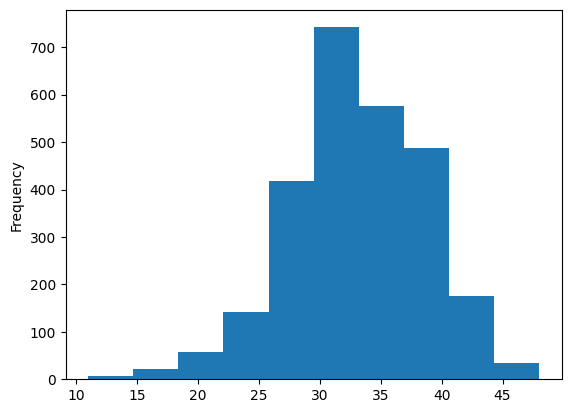

In [112]:
import matplotlib.pyplot as plt

adf.groupby(adf.index)[0].nunique().plot(kind="hist")

In [129]:
import pandas as pd
import glob

bc_lists = glob.glob("/media/leon/Masha/barcodes/SRR14048756_*.txt")
for i in bc_lists:
    sample, cell_type = i.split('/')[-1].split('.txt')[0].split('_')
    # df = pd.read_csv(f"{directory with bc correction outputs}/{sample}.txt", sep='\t', header=None, index_col=1)

    barcodes = open(i).read().splitlines()
    barcodes = [i[3:] for i in barcodes]
    fixed_bcs = set(df.loc[barcodes, 0])
    print(cell_type, len(barcodes), len(fixed_bcs))
    barcodes.extend(fixed_bcs)
    barcodes = ["CR_" + i for i in barcodes]
    # with open(f"/media/leon/Masha/corrected_barcodes/{sample}_{cell_type}.corr.txt", "w") as file:
    #     file.writelines(barcodes)

delta 304 9938
gamma 92 2815
acinar 177 4912
beta 1742 58523
immune 35 1070
EC 30 830
stellate 39 1197
ductal 93 2714
alpha 2660 87786
